In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.svm import SVR

In [36]:
x = [0.20,0.58,1.55,1.56,1.81,1.83,2.12,2.91,3.04,3.74,4.31,5.24,5.98,6.01,7.08,7.31,8.32,8.66,9.50,9.69]
y = [-0.09,  1.25,  1.54,  1.29,  2.67,  1.81,1.73, -0.25, -0.07, -1.08, -2.42, -1.53,-0.88, -0.68,  1.13,   2.64,   1.77,  0.85,0.24672844, -1.15220775]

In [37]:
x = np.array(x).reshape((-1, 1))
y = np.array(y).reshape((-1, 1))
x,y

(array([[0.2 ],
        [0.58],
        [1.55],
        [1.56],
        [1.81],
        [1.83],
        [2.12],
        [2.91],
        [3.04],
        [3.74],
        [4.31],
        [5.24],
        [5.98],
        [6.01],
        [7.08],
        [7.31],
        [8.32],
        [8.66],
        [9.5 ],
        [9.69]]),
 array([[-0.09      ],
        [ 1.25      ],
        [ 1.54      ],
        [ 1.29      ],
        [ 2.67      ],
        [ 1.81      ],
        [ 1.73      ],
        [-0.25      ],
        [-0.07      ],
        [-1.08      ],
        [-2.42      ],
        [-1.53      ],
        [-0.88      ],
        [-0.68      ],
        [ 1.13      ],
        [ 2.64      ],
        [ 1.77      ],
        [ 0.85      ],
        [ 0.24672844],
        [-1.15220775]]))

# Modelo

In [38]:
# Crear modelo SVR
model = SVR(kernel='rbf', C=100, gamma='scale')
model.fit(x, y)

/home/gcasas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100)

In [39]:
x_new = np.linspace(0, 12, 100)[:, np.newaxis]
y_pred = model.predict(x_new)

# Prediccion
## Predicir y evaluacion con nuevos datos

In [40]:
# Nuevos datos para evaluación
x_eval = np.array([1, 3, 5, 7, 9, 11])[:, np.newaxis]
y_eval = 2 * np.sin(x_eval)

# Predicciones en los datos de evaluación
y_pred_eval = model.predict(x_eval)


In [41]:
# Cálculo del coeficiente de determinación (R2)
r2 = r2_score(y_eval, y_pred_eval)
print(f"Coeficiente de Determinación (R2): {r2:.4f}")

Coeficiente de Determinación (R2): 0.8172


## Grafica

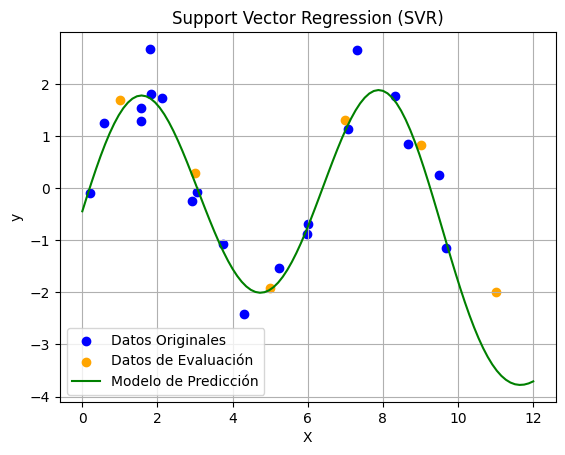

In [42]:
# Gráfico de los datos y el modelo SVR
plt.scatter(x, y, color='blue', label='Datos Originales')
plt.scatter(x_eval, y_eval, color='orange', label='Datos de Evaluación')
plt.plot(x_new, y_pred, color='green', label='Modelo de Predicción')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Support Vector Regression (SVR)')
plt.legend()
plt.grid(True)
plt.show()
